In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import pandas
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
warnings.filterwarnings("ignore")

In [2]:
SeqIO.convert("../../raw_data/Hu_FAH15473_albacore202/workspace/pass/barcode02/barcode02.fastq", "fastq", "../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02.fasta", "fasta")

279742

In [3]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("/media/MassStorage/tmp/TE/summer_project/raw_data/Hu_FAH15473_albacore202/workspace/pass/barcode02/barcode02.fastq", "fastq"))

In [4]:
NS3_FWD = Seq("GCAAGTCTGGTGCCAGCAGCC")
LR6_REV = Seq("CGCCAGTTCTGCTTACC")

279742


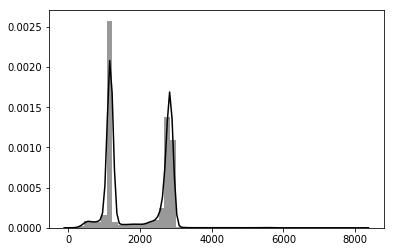

In [5]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print(len(fastq_dict))
sns.distplot(lengths, color="k")

In [6]:
long_ITS = fastq_dict
for key in fastq_dict.copy():
    if len(fastq_dict[key].seq) not in range(2000, 4001):
        del long_ITS[key]

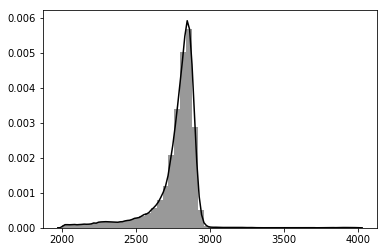

In [7]:
lengths_ITS = []
for key in long_ITS:
    lengths_ITS.append(len(long_ITS[key].seq))
sns.distplot(lengths_ITS, color='k')

In [8]:
# SeqIO.write(long_ITS.values(), "/media/MassStorage/tmp/TE/summer_project/analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta", "fasta")

In [9]:
fastq_ITS = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta", "fasta"))

133755
133755


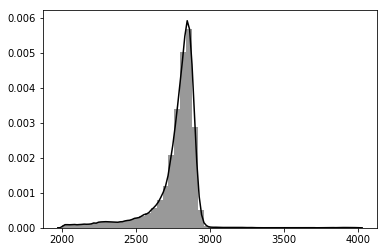

In [10]:
lengths = []
for key in fastq_ITS:
    lengths.append(len(fastq_ITS[key].seq))
print(len(fastq_ITS))
sns.distplot(lengths, color="k")
print(len(lengths))

In [11]:
m = Mothur()

In [12]:
m.help()

In [13]:
m.pcr.seqs(fasta='../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta', oligos='/media/MassStorage/tmp/TE/summer_project/analysis/mothur_fasta/FAH15473/pass/barcode02/primer_test.oligos', pdiffs=0, rdiffs=0)

In [14]:
pcr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.pcr.fasta", "fasta"))

1827


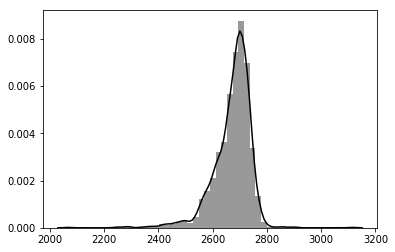

In [15]:
lengths_pcr = []
ids = []
for key in pcr_dict:
    lengths_pcr.append(len(pcr_dict[key].seq))
    ids.append(key)
sns.distplot(lengths_pcr, color='k')
print(len(lengths_pcr))

In [16]:
with open("../../analysis/descriptors/1827_ids.txt", "w") as f:
    for key in pcr_dict:
        f.write("%s\n" % pcr_dict[key].id)

1000


1000

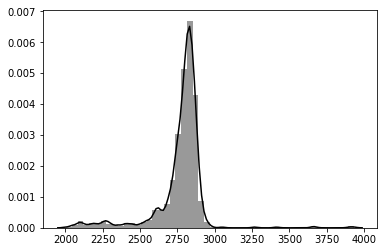

In [17]:
small_dict = {k: fastq_ITS[k] for k in list(fastq_ITS.keys())[:1000]}
lengths_small = []
for key in small_dict:
    lengths_small.append(len(small_dict[key].seq))
sns.distplot(lengths_small, color='k')
print(len(lengths_small))
SeqIO.write(small_dict.values(), "../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small.fasta", "fasta")

In [18]:
initial_file = '../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small.fasta'
base_name = '../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small%i.fasta'
for x in range(0, 10):
    infile=base_name %x
    copy(initial_file, infile)
    m.pcr.seqs(fasta=infile, oligos='../../analysis/mothur_fasta/FAH15473/pass/barcode02/primer_test.oligos', pdiffs=x, rdiffs=x)

Pdiffs value is 9
The number of values available is 319
Pdiffs value is 2
The number of values available is 125
Pdiffs value is 7
The number of values available is 315
Pdiffs value is 1
The number of values available is 74
Pdiffs value is 3
The number of values available is 175
Pdiffs value is 8
The number of values available is 317
Pdiffs value is 0
The number of values available is 29
Pdiffs value is 6
The number of values available is 312
Pdiffs value is 4
The number of values available is 228
Pdiffs value is 5
The number of values available is 268


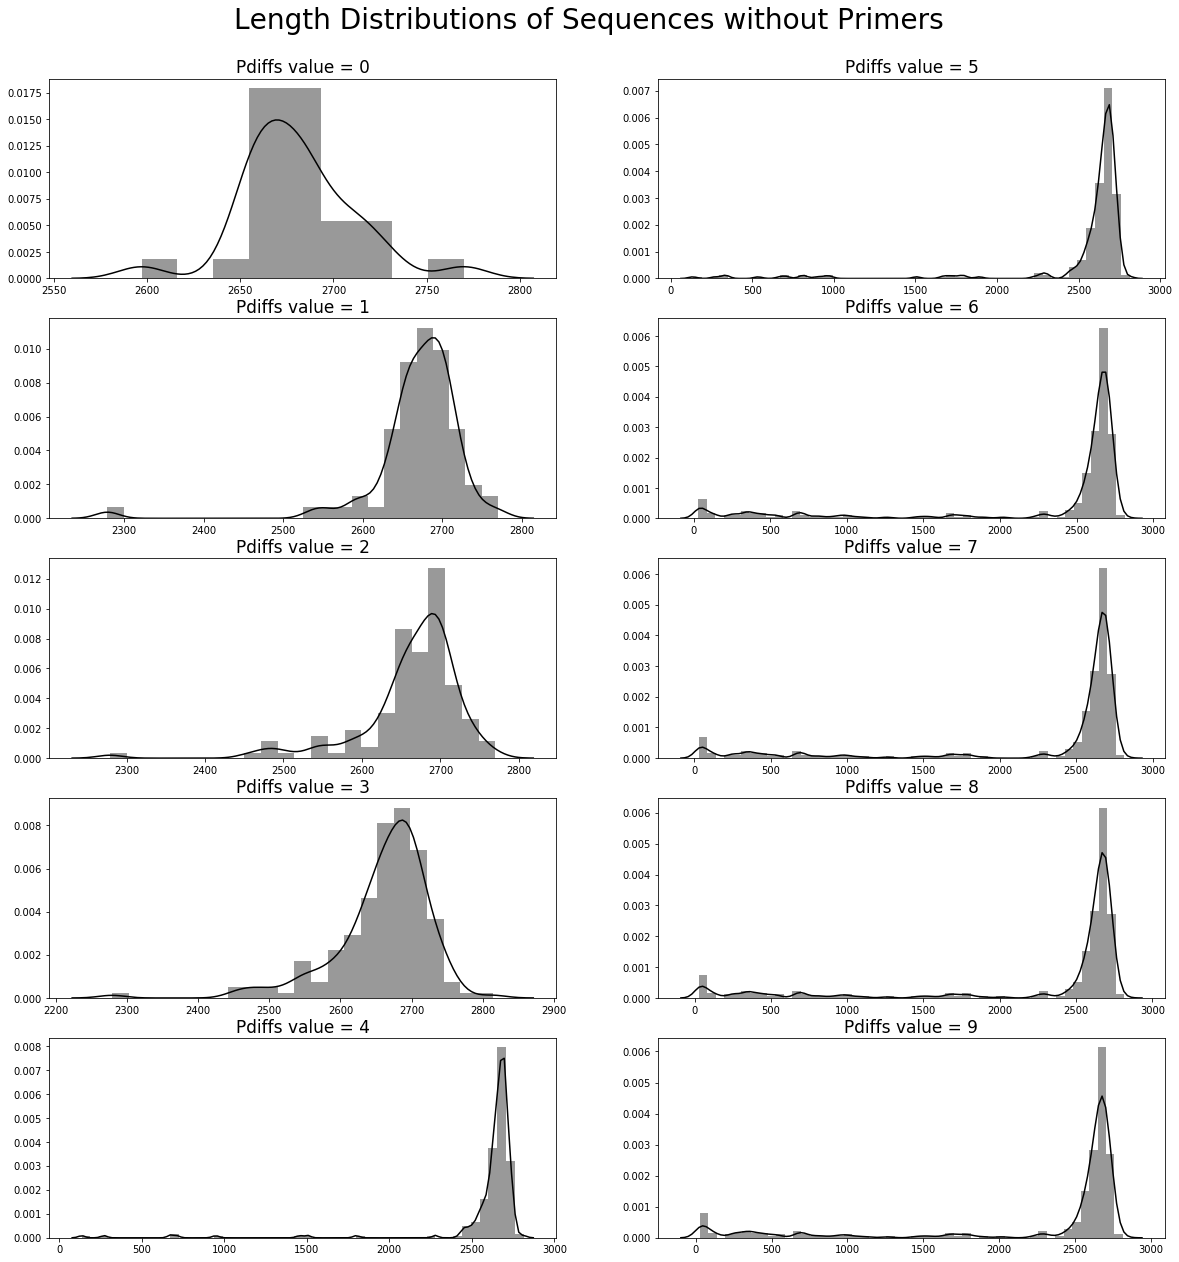

In [19]:
fg, ax = plt.subplots(5,2, figsize=(20,20))
fg.suptitle("Length Distributions of Sequences without Primers", fontsize=28)
fg.subplots_adjust(top=0.93)
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        print("Pdiffs value is", os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            lengths_tmp.append(len(tmp_dict[key].seq))
        print("The number of values available is", len(lengths_tmp))
        if pdiffs < 5:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs][0])
            ax[pdiffs][0].set_title(pdiffs_str, fontsize=17)
        else:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs - 5][1])
            ax[pdiffs - 5][1].set_title(pdiffs_str, fontsize=17)

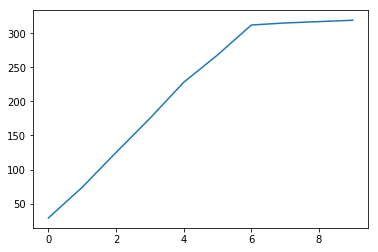

In [28]:
x = []
y = []
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        x.append(pdiffs)
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            lengths_tmp.append(len(tmp_dict[key].seq))
        y.append(len(lengths_tmp))
sns.lineplot(x, y)

In [20]:
qscores = []
ids = []
smallq_dict = {k: long_ITS[k] for k in list(long_ITS.keys())[:1000]}
for record in smallq_dict:
    ids.append(smallq_dict[record].id)
for key in smallq_dict:
    qscores.append((-10*np.log10(np.mean(10**(-1*np.array((smallq_dict[key].letter_annotations["phred_quality"]))/10)))))
smallq_qscores_dataframe = df(qscores, columns=["Mean"], index=ids)
lengths_smallq = []
for key in smallq_dict:
    lengths_smallq.append(len(smallq_dict[key].seq))

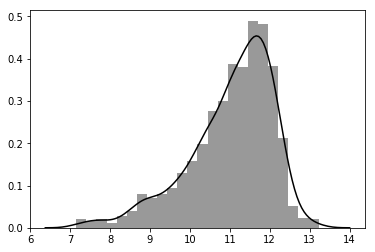

In [21]:
sns.distplot((qscores), color="k")

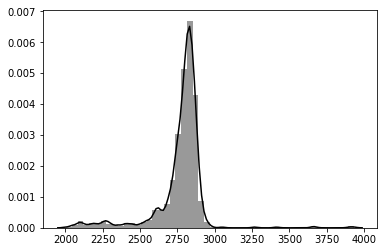

In [22]:
sns.distplot(lengths_smallq, color="k")

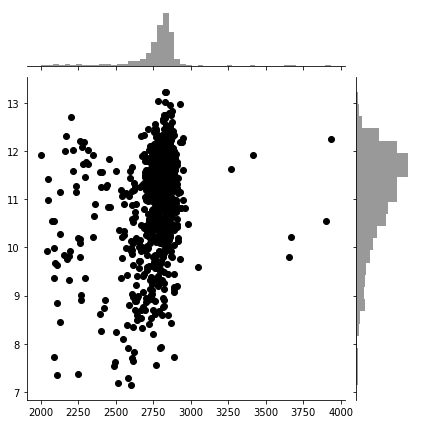

In [23]:
sns.jointplot(x=lengths_smallq, y=qscores, color="k")

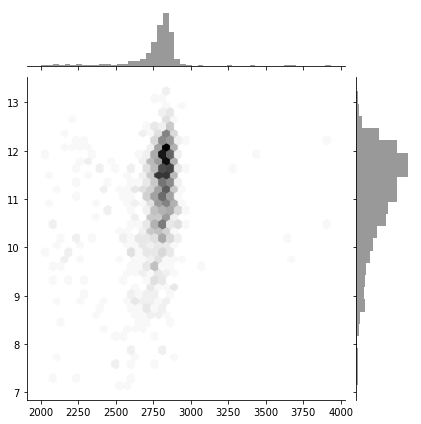

In [24]:
sns.jointplot(x=lengths_smallq, y=qscores, kind="hex", color="k")

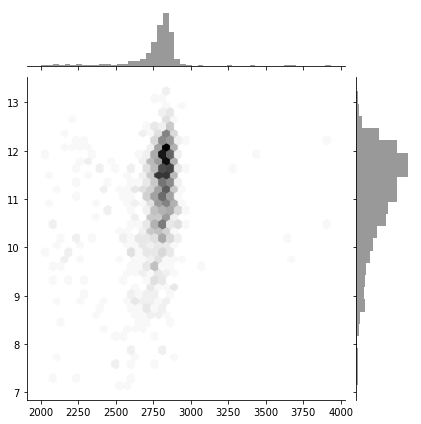

In [25]:
sns.jointplot(x=lengths_smallq, y=qscores, kind="hex", color="k")

### Choosing pdiffs and rdiffs of 6 as the maximised values

In [26]:
for key in SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small6.fasta", "fasta")):
    print(key)

98919c78-8e84-47bf-bfd3-88bce3bb6e84
412452d2-865a-40b2-8e22-2eb2f1da1ce1
4deca0d8-9994-4900-b3d2-344fe60cb7fd
78d0ccf7-6594-4c01-ad10-00b491932570
473d399a-ea80-4d5d-a380-737e38e7bd18
aa3a27fb-9287-4b46-8ace-d6ae5d7d70c7
facaebfb-3fc0-497d-af8d-cc89d1a97a63
3ebf246b-a71b-4139-8f9b-4a21a574a09d
68b2b936-8628-4adb-a6c0-b49459264a06
c89615b8-430f-4d4b-82ae-6fb6ec60d85d
46d60a38-07ff-40d8-a5a9-978dc4cbfd74
3874116a-3086-45ed-b6ad-baabca6fa4d1
79e4effd-2107-4245-9e81-59787ad11f5b
cb8965a7-de9b-4425-b18c-c94c7636e877
f6358e4f-bd2e-4596-a316-4fdee2f42e73
2276eb94-7c9f-4317-865a-cdc51811a5d1
c6423a60-3145-407e-b047-2d77706c6397
f2bb2b57-5502-464b-a280-c92e0a9ad7aa
3d79f606-5bf4-4a50-bede-73f8f9980a1d
02c3d01b-625c-41a7-a8e4-05f3d6d12773
22b9516c-85c6-4f04-9ad5-ac0fa92ed2f4
939a0876-498d-4c05-b6dd-8ec9add384bd
6af275b7-8ef8-4ce9-b41d-bd9e620b4f86
5d27267d-f3b2-49ca-8739-25930dee5326
ae84a52e-a964-4eda-895f-fbe62c710d1d
ddb329da-eb5f-4c2d-90bc-b61caaf87922
810a3837-ceef-40cf-beb9-e17c862d1033
b